In [6]:

import pandas as pd  #importing the libraries
import numpy as np

In [ ]:
df=pd.read_csv # this is how I tell them how to immport the data(CSV file)

In [2]:
df=pd.read_excel?

In [3]:
df=pd.read_csv?


In [ ]:
df=pd.read_csv

In [2]:
# loading the data file
df=pd.read_excel("Sample - Superstore.xls")
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [403]:
df.columns  
# What #getting all columns names printed
# Why : So that I can get clue about which columns to retain and which one to drop

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [404]:
# Keep the required columns
df = df[['Customer ID', 'Sales', 'Order_Date']]

Index(['Customer ID', 'Sales', 'Order_Date'], dtype='object')

In [7]:
# What I am doing here | Why I am doing this ?
#_______________________________________________________
today=pd.datetime.now()   # TIME STAMP : getting today's date
today=pd.to_datetime(today.date())        #only date, no time

AttributeError: module 'pandas' has no attribute 'datetime'

In [4]:
today = pd.Timestamp.now()  # Getting current date and time
today_date = today.date()   # Extracting the date

print(today)
print(today_date)

2023-12-28 15:08:34.875457
2023-12-28


In [406]:
# type(today)
data["Recency"]=today-data['Order_Date']   #getting recency in no of days ,from todays date to the last order date
# type(grouped["Order_Date"])
data.head()

,Customer ID,Sales,Order_Date,Recency
0,CG-12520,261.9600,2016-11-08,1498 days
1,CG-12520,731.9400,2016-11-08,1498 days
2,DV-13045,14.6200,2016-06-12,1647 days
3,SO-20335,957.5775,2015-10-11,1892 days
4,SO-20335,22.3680,2015-10-11,1892 days


In [407]:
grouped = data.groupby(by='Customer ID').agg({"Recency":'min',
                                               "Customer ID":'count', 
                                              'Sales': 'sum'})
#grouping data by customer id
grouped.info() #aggreagting on recency for latest orders, customer id for count of each order, sales to sum all previous orders values

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, AA-10315 to ZD-21925
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   Recency      793 non-null    timedelta64[ns]
 1   Customer ID  793 non-null    int64          
 2   Sales        793 non-null    float64        
dtypes: float64(1), int64(1), timedelta64[ns](1)
memory usage: 24.8+ KB


In [408]:
grouped.head(5)

,Recency,Customer ID,Sales
Customer ID,,,
AA-10315,1265 days,11,5563.560
AA-10375,1100 days,15,1056.390
AA-10480,1340 days,12,1790.512
AA-10645,1136 days,18,5086.935
AB-10015,1496 days,6,886.156


In [409]:
grouped=grouped.rename(columns={'Customer ID':'Frequency' , 'Sales':'Monetary' })   #renaming column names
grouped.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

In [1]:
import pandas as pd

In [5]:
pd.qcut? # What | Why | How 

SyntaxError: invalid syntax (346759594.py, line 1)

In [410]:
# creating 4 groups in the data
#labels=['Q1','Q2','Q3','Q4']
grouped['Q_Recency'] = pd.qcut(grouped["Recency"], 4, labels = False) # Quartiling I  am doing

# grouped['Q_Recency'] = pd.qcut(grouped["Recency"], 10, labels = False) # Deciling I am doing

grouped['Q_Frequency'] = pd.qcut(grouped["Frequency"], 4, labels = False)
grouped['Q_Monetary'] = pd.qcut(grouped["Monetary"], 4, labels = False)

In [411]:
grouped.head(3)

,Recency,Frequency,Monetary,Q_Recency,Q_Frequency,Q_Monetary
Customer ID,,,,,,
AA-10315,1265 days,11,5563.560,3,1,3
AA-10375,1100 days,15,1056.390,0,2,0
AA-10480,1340 days,12,1790.512,3,1,1


In [412]:
Status=[]                                  #assigning status acc to rencency values
for a in grouped['Q_Recency']:           
    if a==0:                                #lies in quartile 1
        Status.append("Active")
    elif (a==1 or a==2):                    #lies in q2 or q3
        Status.append("Risky")
    else:
        Status.append("Churned")             #liesin q4



In [413]:
a_series=pd.Series(Status).values
grouped["Status"]=a_series                    #adding Status column to the dataframe

In [414]:
grouped

,Recency,Frequency,Monetary,Q_Recency,Q_Frequency,Q_Monetary,Status
Customer ID,,,,,,,
AA-10315,1265 days,11,5563.560,3,1,3,Churned
AA-10375,1100 days,15,1056.390,0,2,0,Active
AA-10480,1340 days,12,1790.512,3,1,1,Churned
AA-10645,1136 days,18,5086.935,1,3,3,Risky
AB-10015,1496 days,6,886.156,3,0,0,Churned
...,...,...,...,...,...,...,...
XP-21865,1124 days,28,2374.658,1,3,2,Risky
YC-21895,1085 days,8,5454.350,0,0,3,Active
YS-21880,1090 days,12,6720.444,0,1,3,Active


In [415]:
SegmentNames=[]
f=grouped['Q_Frequency']
m=grouped['Q_Monetary']
sum_dict={0:'', 1:'', 2:'Silver', 3:'Silver', 4:'Gold', 5:'Gold', 6:'Premium'}

totalof_fm=f+m

grouped['CustomerValue'] = totalof_fm.map(sum_dict)                   #assigning customer_value acc to q_frequency nd q_monetary

grouped.head()

,Recency,Frequency,Monetary,Q_Recency,Q_Frequency,Q_Monetary,Status,CustomerValue
Customer ID,,,,,,,,
AA-10315,1265 days,11,5563.560,3,1,3,Churned,Gold
AA-10375,1100 days,15,1056.390,0,2,0,Active,Silver
AA-10480,1340 days,12,1790.512,3,1,1,Churned,Silver
AA-10645,1136 days,18,5086.935,1,3,3,Risky,Premium
AB-10015,1496 days,6,886.156,3,0,0,Churned,


In [416]:
#  rename values for quartiles
labels={0:'Q1', 1:'Q2', 2:'Q3', 3:'Q4'}
grouped['Q_Recency'] = grouped['Q_Recency'].map(labels) 
grouped['Q_Frequency'] = grouped['Q_Frequency'].map(labels)
grouped['Q_Monetary'] = grouped['Q_Monetary'].map(labels)


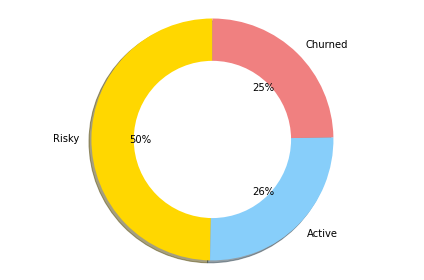

In [417]:
import matplotlib.pyplot as plt
new=list(grouped['Status'].value_counts())               #get a list to fed to the pie chart
colors = ['gold', 'lightskyblue', 'lightcoral']
plt.pie(new, labels=["Risky","Active","Churned"] , autopct='%0.f%%', colors=colors, shadow=True, startangle=90) #create pie chart


#create donut from above pie chart
circle = plt.Circle((0,0),0.65,fc='white') 
donut = plt.gcf()
donut.gca().add_artist(circle)
plt.axis('equal')
plt.tight_layout()

In [418]:
grouped.head()            #########final table

,Recency,Frequency,Monetary,Q_Recency,Q_Frequency,Q_Monetary,Status,CustomerValue
Customer ID,,,,,,,,
AA-10315,1265 days,11,5563.560,Q4,Q2,Q4,Churned,Gold
AA-10375,1100 days,15,1056.390,Q1,Q3,Q1,Active,Silver
AA-10480,1340 days,12,1790.512,Q4,Q2,Q2,Churned,Silver
AA-10645,1136 days,18,5086.935,Q2,Q4,Q4,Risky,Premium
AB-10015,1496 days,6,886.156,Q4,Q1,Q1,Churned,
